## Plot histograms from MP3C data

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
from pandas import *
import numpy as np
%matplotlib inline
from calendar import monthrange
from math import *

In [2]:
# Read in MP3C data from local file
# DtypeWarning: Columns (3,4,15,22,23,69) have mixed types.Specify dtype option on import or set low_memory=False.
MP3C_ALL = read_csv('MP3C/mp3c-all.txt', sep='\t', low_memory=False)
MP3C_NEA = read_csv('MP3C/mp3c-nea.txt', sep='\t', low_memory=False)
MP3C_AA = read_csv('MP3C/mp3c-atens-and-apollos.txt', sep='\t', low_memory=False)

In [3]:
MP3C_ALL['mass_per'] = MP3C_ALL['mass_err']/MP3C_ALL['mass']*100
MP3C_NEA['mass_per'] = MP3C_NEA['mass_err']/MP3C_NEA['mass']*100
MP3C_AA['mass_per'] = MP3C_AA['mass_err']/MP3C_AA['mass']*100

In [4]:
# Count number of asteroids with no mass_err
# Plot histogram
# Add extra class with no mass_err?
print(f'Number of asteroids with mass defined: {MP3C_ALL.shape[0]}')
print(f'Number of NEA with mass defined: {MP3C_NEA.shape[0]}')
print(f'Number of Atens/Apollos with mass defined: {MP3C_AA.shape[0]}')
print(f'Number of asteroids with mass error defined: {MP3C_ALL.dropna(subset=["mass_err"]).shape[0]}')
print(f'Number of NEA with mass error defined: {MP3C_NEA.dropna(subset=["mass_err"]).shape[0]}')
print(f'Number of Atens/Apollos with mass error defined: {MP3C_AA.dropna(subset=["mass_err"]).shape[0]}')

Number of asteroids with mass defined: 436
Number of NEA with mass defined: 21
Number of Atens/Apollos with mass defined: 17
Number of asteroids with mass error defined: 420
Number of NEA with mass error defined: 15
Number of Atens/Apollos with mass error defined: 11


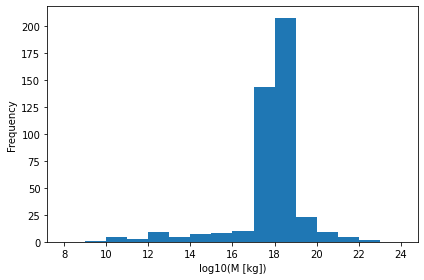

0.0003861003861003861 507.258064516129 24.081300186686132


In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, 
                        ncols=1, 
                        # sharex='col', 
                        sharey='row', 
                        squeeze=True, 
                        figsize=(6, 4))

MP3C_ALL['log10(M)'] = MP3C_ALL['mass'].apply(log10)

plt.hist(MP3C_ALL['log10(M)'], 
    bins=np.arange(8,25,1)
    )
ax.set(ylabel = 'Frequency', xlabel = 'log10(M [kg])')
fig.patch.set_alpha(1)
fig.tight_layout()
plt.savefig('MP3C_ALL.png')
plt.show()
plt.close()
print(MP3C_ALL['mass_per'].min(), MP3C_ALL['mass_per'].max(), MP3C_ALL['mass_per'].mean())

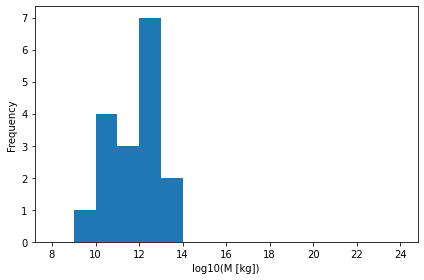

2.1686746987951806 33.26923076923077 12.331017525328553


In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, 
                        ncols=1, 
                        # sharex='col', 
                        sharey='row', 
                        squeeze=True, 
                        figsize=(6, 4))

MP3C_AA['log10(M)'] = MP3C_AA['mass'].apply(log10)

plt.hist(MP3C_AA['log10(M)'], 
    bins=np.arange(8,25,1)
    )
ax.set(ylabel = 'Frequency', xlabel = 'log10(M [kg])')
fig.patch.set_alpha(1)
fig.tight_layout()
plt.savefig('MP3C_AA.png')
plt.show()
plt.close()
print(MP3C_AA['mass_per'].min(), MP3C_AA['mass_per'].max(), MP3C_AA['mass_per'].mean())

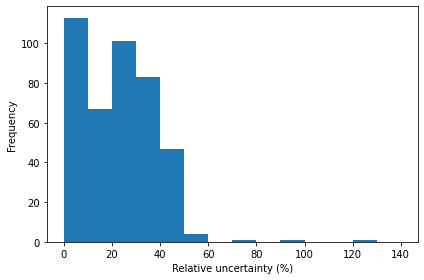

0.0003861003861003861 507.258064516129 24.081300186686132 22.17391304347826


In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, 
                        ncols=1, 
                        # sharex='col', 
                        sharey='row', 
                        squeeze=True, 
                        figsize=(6, 4))
plt.hist(MP3C_ALL.dropna(subset=['mass_err'])['mass_per'], 
    bins=np.arange(0,150,10)
    )
ax.set(ylabel = 'Frequency', xlabel = 'Relative uncertainty (%)')
fig.patch.set_alpha(1)
fig.tight_layout()
plt.savefig('MP3C_ALL_unc.png')
plt.show()
plt.close()
print(MP3C_ALL['mass_per'].min(), MP3C_ALL['mass_per'].max(), MP3C_ALL['mass_per'].mean(), MP3C_ALL['mass_per'].median(), )

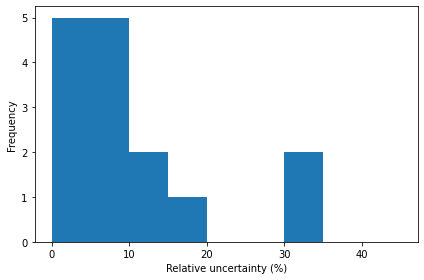

0.044544095665171896 33.26923076923077 9.777921904520058


In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, 
                        ncols=1, 
                        # sharex='col', 
                        sharey='row', 
                        squeeze=True, 
                        figsize=(6, 4))
plt.hist(MP3C_NEA.dropna(subset=['mass_err'])['mass_per'], 
    bins=np.arange(0,50,5)
    )
ax.set(ylabel = 'Frequency', xlabel = 'Relative uncertainty (%)')
fig.patch.set_alpha(1)
fig.tight_layout()
plt.savefig('MP3C_AA_unc.png')
plt.show()
plt.close()
print(MP3C_NEA['mass_per'].min(), MP3C_NEA['mass_per'].max(), MP3C_NEA['mass_per'].mean())